In [1]:
column_names=["Page Popularity/likes","Page Checkin's","Page talking about","Page Category",
              "min_CC1","max_CC1","avg_CC1","med_CC1","std_CC1",
              "min_CC2","max_CC2","avg_CC2","med_CC2","std_CC2",
              "min_CC3","max_CC3","avg_CC3","med_CC3","std_CC3",
              "min_CC4","max_CC4","avg_CC4","med_CC4","std_CC4",
              "min_CC5","max_CC5","avg_CC5","med_CC5","std_CC5",
              "CC1","CC2","CC3","CC4","CC5","Base time","Post length","Post Share Count","Post Promotion Status",
              "H Local","Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday_base_dt","Sunday_base_dt","Monday_base_dt","Tuesday_base_dt","Wednesday_base_dt","Thursday_base_dt","Friday_base_dt","Target Variable"]

In [2]:
print(f"On a {len(column_names)} features")

On a 54 features


# Importation des données

In [3]:
import os
os.getcwd()

'C:\\Users\\Nono\\Desktop\\CoursInge\\CoursA5\\PythonForDataAnalysis\\projet'

In [4]:
import pandas as pd

train_set_V1=pd.read_csv("Dataset/Training/Features_Variant_1.csv", sep=",",encoding="UTF-8",header=None,names=column_names)
train_set_V2=pd.read_csv("Dataset/Training/Features_Variant_2.csv", sep=",",encoding="UTF-8",header=None,names=column_names)
train_set_V3=pd.read_csv("Dataset/Training/Features_Variant_3.csv", sep=",",encoding="UTF-8",header=None,names=column_names)
train_set_V4=pd.read_csv("Dataset/Training/Features_Variant_4.csv", sep=",",encoding="UTF-8",header=None,names=column_names)
train_set_V5=pd.read_csv("Dataset/Training/Features_Variant_5.csv", sep=",",encoding="UTF-8",header=None,names=column_names)

In [5]:
train_set_V1.head(5)

,Page Popularity/likes,Page Checkin's,Page talking about,Page Category,min_CC1,max_CC1,avg_CC1,med_CC1,std_CC1,min_CC2,...,Thursday,Friday,Saturday_base_dt,Sunday_base_dt,Monday_base_dt,Tuesday_base_dt,Wednesday_base_dt,Thursday_base_dt,Friday_base_dt,Target Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
train_set_V1.shape 

(40949, 54)

In [7]:
verifie_train_pd=[train_set_V1,train_set_V2,train_set_V3,train_set_V4,train_set_V5]

In [8]:
for train_set in verifie_train_pd: #Voir tableau Instance_count
    print(train_set.shape)

(40949, 54)
(81312, 54)
(121098, 54)
(160424, 54)
(199030, 54)


# Vérifications de l'ordre, des résultats des min_CCX,max_CCX,...

* 134 postes sur la première page.
* Il serait biensur intéressant de tester la correspondance de toute les colonnes pour chaque page pour chaque train_variant mais le dataset à omis l'id de la page. Nous n'avons pas d'identification unique qui définit la page ce qui nous permettrait la séparation.

In [9]:
### Vérifications de l'ordre des min_CCX,max_CCX,... ###

from statistics import mean,stdev,median

#Un essai a quand même était fait

resultat="Réussi"
for (set_corr,train_set) in enumerate(verifie_train_pd):
    print("...")
    for i in range(1,6):
        if max(train_set[f"CC{i}"][0:134])!=train_set[f"max_CC{i}"][0:134][0]:
            resultat=f"Error train_set_V{set_corr+1}"
            break
        if min(train_set[f"CC{i}"][0:134])!=train_set[f"min_CC{i}"][0:134][0]:
            resultat=f"Error train_set_V{set_corr+1}"
            break
        if round(mean(train_set[f"CC{i}"][0:134]),3)!=round(train_set[f"avg_CC{i}"][0:134][0],3):
            resultat=f"Error train_set_V{set_corr+1}"
            break
        if round(median(train_set[f"CC{i}"][0:134]),3)!=round(train_set[f"med_CC{i}"][0:134][0],3):
            resultat=f"Error train_set_V{set_corr+1}"
            break
        if round(stdev(train_set[f"CC{i}"][0:134]),3)!=round(train_set[f"std_CC{i}"][0:134][0],3):
            resultat=f"Error train_set_V{set_corr+1}"
            break
    print(resultat)

#Ce n'est pas exactement la même à un certain nombre près après la virgule
#pour la moyenne train_set_V1["CC1"] 11.291044776119403 11.291044776119405


...
Error train_set_V1
...
Error train_set_V2
...
Error train_set_V3
...
Error train_set_V4
...
Error train_set_V5


In [10]:
print(max(verifie_train_pd[0][f"CC1"][0:134]),verifie_train_pd[0][f"max_CC1"][0:134][0])

806 806.0


In [11]:
print(round(stdev(verifie_train_pd[0][f"CC1"][0:134]),3),round(verifie_train_pd[0][f"std_CC1"][0:134][0],3))

70.76 70.495


* Conclusion : le dataset ne permet pas la vérification de la cohérence des colonnes (ex: max, min, avg,...). 
* De plus malgré l'arrondissement à trois chiffres après la virgule nous observons une différence pour l'écart type du train_set_V1 entre ses colonnes CC1 et std_CC1 pour la première page (déterminé en lecture sur le dataset). 
* La phase de test nous a quand même permis d'insérer nos colonnes dans le bonne ordre min_CC1 puis max_CC1 ect...
* Par la suite on passe la phase de test et faisons total confiance à la cohérence du dataset.

# Data visualisation


# Distribution de la target


In [12]:
def plot_densite_com(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        list_aggr_train_set.append(train_set["Target Variable"])
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0],
            "train_set_V2":list_aggr_train_set[1],
            "train_set_V3":list_aggr_train_set[2],
            "train_set_V4":list_aggr_train_set[3],
            "train_set_V5":list_aggr_train_set[4],
        }
    )
    ax1=graph.plot.kde(title="Densité des commentaire dans le dataset",figsize=(10, 5))
    ax1.set_xlim(-15,25)

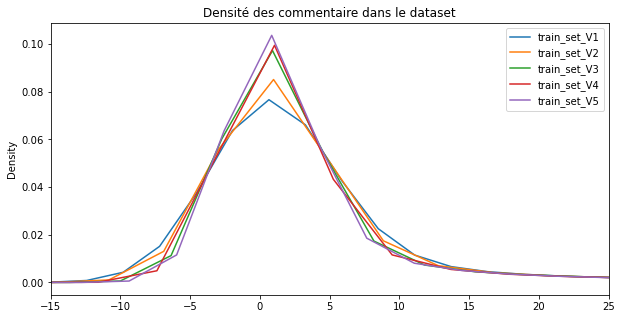

In [13]:
plot_densite_com(verifie_train_pd)

In [14]:
#Le nb_com par poste est concentré entre 0,10 

In [15]:
def plot_repartition_com(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        list_aggr_train_set.append(train_set["Target Variable"])
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0],
            "train_set_V2":list_aggr_train_set[1],
            "train_set_V3":list_aggr_train_set[2],
            "train_set_V4":list_aggr_train_set[3],
            "train_set_V5":list_aggr_train_set[4],
        }
    )
    ax1=graph.plot.hist(alpha=0.1,title="Répartion des commentaire dans le dataset",bins=50,figsize=(10, 5))
    ax1.set_xlim(0,320)

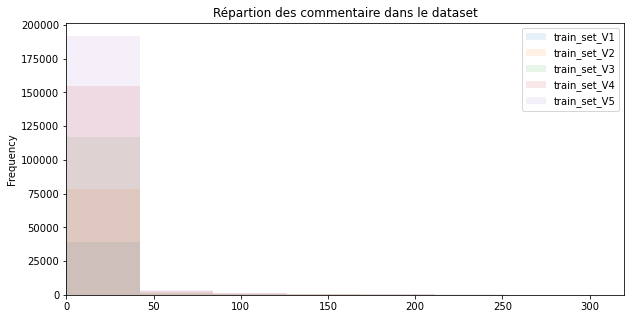

In [16]:
plot_repartition_com(verifie_train_pd) 

In [17]:
#nb_comentaire entre 0 et 48 par poste pour la majorité, très peu nb_commentaire de plus de 50

## Nombre de commentaires en fonction de la catégorie de la page

In [18]:
import matplotlib.pyplot as plt


In [19]:
train_set_V1["Page Category"].unique()

array([  1,   4,   5,   8,   9,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,   2,  24,  25,  28,  29,  30,  31,  32,  34,  36,
        27,  38,  39,  33,  46,  47,  45,  49,  50,  54,  55,  44,  56,
        57,  58,  59,  60,  62,  26,  67,  68,   6,  72,  42,  73,  75,
        76,  63,  77,  12,  79,  80,  40,  35,  81,  82,  83,  10,  87,
        89,  90,  91,  11,  93,  96, 100, 101,  85,  92,  51, 105,  66,
       106,  61,   3], dtype=int64)

In [20]:
def plot_repartition_com_dans_catégorie(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        list_aggr_train_set.append(train_set.groupby("Page Category")["Target Variable"].sum())
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0],
            "train_set_V2":list_aggr_train_set[1],
            "train_set_V3":list_aggr_train_set[2],
            "train_set_V4":list_aggr_train_set[3],
            "train_set_V5":list_aggr_train_set[4],
        }
    )
    graph.plot(kind="bar",title="Répartition des commentaire dans les catégories",figsize=(30, 20))


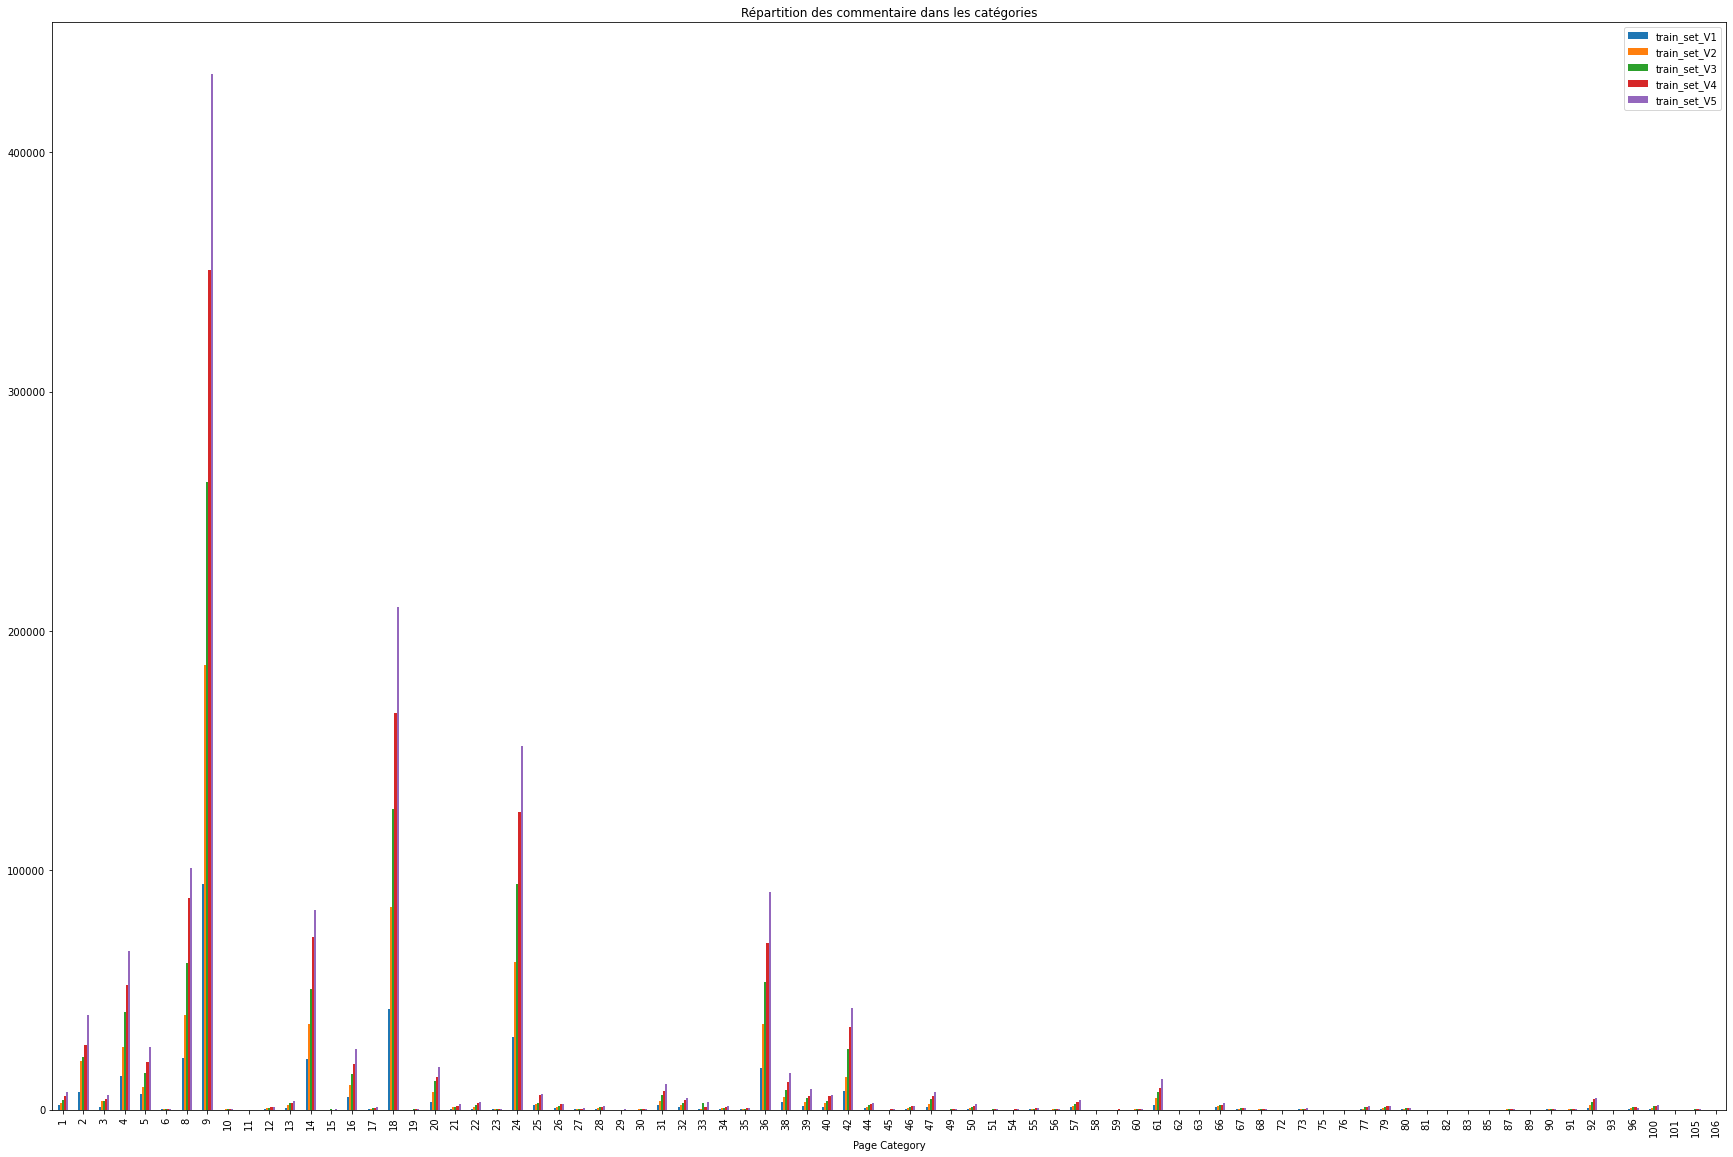

In [21]:
plot_repartition_com_dans_catégorie(verifie_train_pd)
#On voit qu'il y a des catégories qui ont beaucoup plus de succès pour le nombre de commentaire.


In [22]:
def plot_repartition_com_dans_catégorie_Top_20(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        list_aggr_train_set.append((train_set.groupby("Page Category")["Target Variable"].sum()).sort_values(ascending=False))
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0][0:20],
            "train_set_V2":list_aggr_train_set[1][0:20],
            "train_set_V3":list_aggr_train_set[2][0:20],
            "train_set_V4":list_aggr_train_set[3][0:20],
            "train_set_V5":list_aggr_train_set[4][0:20],
        }
    )
    graph.plot(rot=0,kind="bar",title="Répartition des commentaire dans les catégories",figsize=(15, 8))

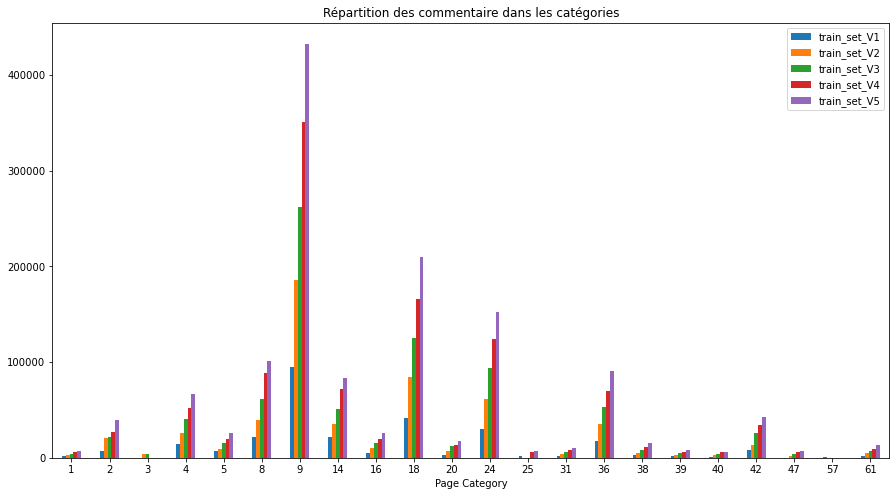

In [23]:
plot_repartition_com_dans_catégorie_Top_20(verifie_train_pd)

In [24]:
#Il y a t-il un lien entre la popularité/like de la page et la catégorie de la page. (La cat 9 est elle aussi la plus apprécié ?)
def plot_repartition_like_dans_catégorie(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        list_aggr_train_set.append((train_set.groupby("Page Category")["Page Popularity/likes"].sum()).sort_values(ascending=False))
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0][0:20],
            "train_set_V2":list_aggr_train_set[1][0:20],
            "train_set_V3":list_aggr_train_set[2][0:20],
            "train_set_V4":list_aggr_train_set[3][0:20],
            "train_set_V5":list_aggr_train_set[4][0:20],
        }
    )
    graph.plot(rot=0,kind="bar",title="Répartition des likes dans les catégories",figsize=(10, 5))

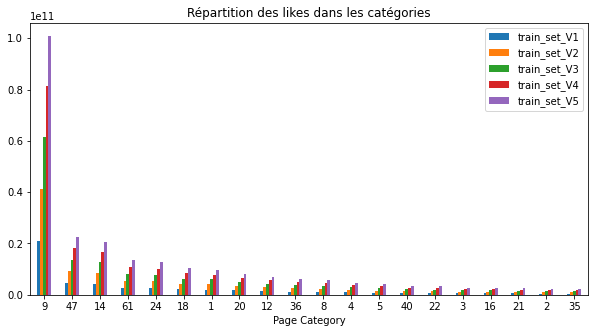

In [25]:
plot_repartition_like_dans_catégorie(verifie_train_pd)
#Catégorie page avec le plus de commentaire (9,18,24,36)
#Catégorie page le plus populaires (9,47,14,61)


* Conclusion : La meilleur catégorie avec le plus grand nombre de commentaire est la numéro  9.
* On voit une corrélation, les catégories jouent clairement sur le nombre de commentaire.
* On appercoit une évolution du nombre de commentaires totale dans une catégorie en fonction du base date/time (en générale plus il augmente plus le Nombre de commentaires totales augmentent).
* Les pages avec le plus grand nombre de commentaires ne sont pas forcément les pages avec le plus de like.



In [26]:
#Top 15 des catégories qui recoivent en moyenne le plus de commentaire sur un poste
def plot_moy_com_by_poste_by_catégorie_Top_20(verifie_train_pd):
    list_aggr_train_set=[]
    for train_set in verifie_train_pd:
        pd_nb_poste_by_cat=train_set.groupby("Page Category")["Page Category"].sum()
        list_aggr_train_set.append((train_set.groupby("Page Category")["Target Variable"].sum()).sort_values(ascending=False)/pd_nb_poste_by_cat)
    graph=pd.DataFrame(
        {
            "train_set_V1":list_aggr_train_set[0][0:20],
            "train_set_V2":list_aggr_train_set[1][0:20],
            "train_set_V3":list_aggr_train_set[2][0:20],
            "train_set_V4":list_aggr_train_set[3][0:20],
            "train_set_V5":list_aggr_train_set[4][0:20],
        }
    )
    graph.plot(rot=0,kind="bar",title="Répartition des commentaires dans les catégories",figsize=(15, 8))

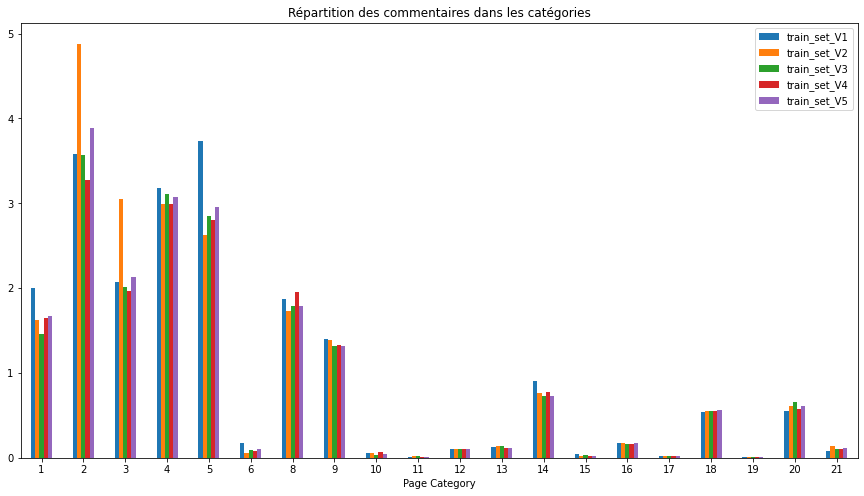

In [27]:
plot_moy_com_by_poste_by_catégorie_Top_20(verifie_train_pd)

* En moyenne c'est la catégorie 2 qui recoit le plus de commentaire sur un poste (On considère un train_set pour faire le comparaison.
* La différence entre le train_set est à cause du nombre de poste qui augmente dans les heures et pas forcéments le nombre de commentaire.

## Répartition du nombre de commentaires sur les jours de la semaine toute page confondue

In [28]:
def plot_repartition_post_sur_jour(verifie_train_pd):
    list_aggr_train_set=[]
    train=pd.Series(index=["Saturday", "Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday"],name="Le Nombre de poste en fonction du jour de la semaine")
    for train_set in verifie_train_pd:
        train["Saturday"]=train_set[train_set["Saturday"]==1].count()[0]#Une ligne correspond à un poste unique dans 
        train["Sunday"]=train_set[train_set["Sunday"]==1].count()[0]
        train["Monday"]=train_set[train_set["Monday"]==1].count()[0]
        train["Tuesday"]=train_set[train_set["Tuesday"]==1].count()[0]
        train["Wednesday"]=train_set[train_set["Wednesday"]==1].count()[0]
        train["Thursday"]=train_set[train_set["Thursday"]==1].count()[0]
        train["Friday"]=train_set[train_set["Friday"]==1].count()[0]
        list_aggr_train_set.append(train)
    list_aggr_train_set[0].plot.pie(autopct="%.2f",fontsize=20,figsize=(8, 8)) 

<ipython-input-28-42672d94dd09>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train=pd.Series(index=["Saturday", "Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday"],name="Le Nombre de poste en fonction du jour de la semaine")


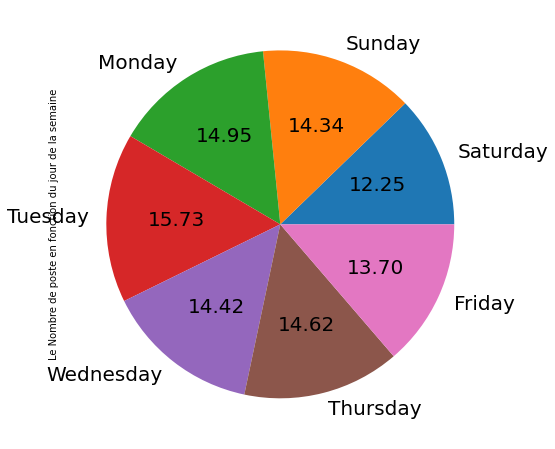

In [29]:
plot_repartition_post_sur_jour(verifie_train_pd)

In [30]:
#Les postes ont été pris uniformément dans la semaine (légérement plus le mardi)
#=> montre que les chercheurs ont vraiment voulue se focaliser sur l'heure

In [221]:
def plot_repartition_com_sur_jour(verifie_train_pd):
    list_aggr_train_set=[]
    train=pd.Series(index=["Saturday", "Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday"],name="Répartition du nombre de commentaires sur les jours de la semaine")
    for train_set in verifie_train_pd:
        train["Saturday"]=train_set[train_set["Saturday"]==1]["Target Variable"].sum()/train_set[train_set["Saturday"]==1].count()[0]
        train["Sunday"]=train_set[train_set["Sunday"]==1]["Target Variable"].sum()/train_set[train_set["Sunday"]==1].count()[0]
        train["Monday"]=train_set[train_set["Monday"]==1]["Target Variable"].sum()/train_set[train_set["Monday"]==1].count()[0]
        train["Tuesday"]=train_set[train_set["Tuesday"]==1]["Target Variable"].sum()/train_set[train_set["Tuesday"]==1].count()[0]
        train["Wednesday"]=train_set[train_set["Wednesday"]==1]["Target Variable"].sum()/train_set[train_set["Wednesday"]==1].count()[0]
        train["Thursday"]=train_set[train_set["Thursday"]==1]["Target Variable"].sum()/train_set[train_set["Thursday"]==1].count()[0]
        train["Friday"]=train_set[train_set["Friday"]==1]["Target Variable"].sum()/train_set[train_set["Friday"]==1].count()[0]
        list_aggr_train_set.append(train)
    list_aggr_train_set[0].plot.pie(autopct="%.2f",fontsize=20,figsize=(8, 8))

<ipython-input-221-b1b6a2d535d0>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train=pd.Series(index=["Saturday", "Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday"],name="Répartition du nombre de commentaires sur les jours de la semaine")


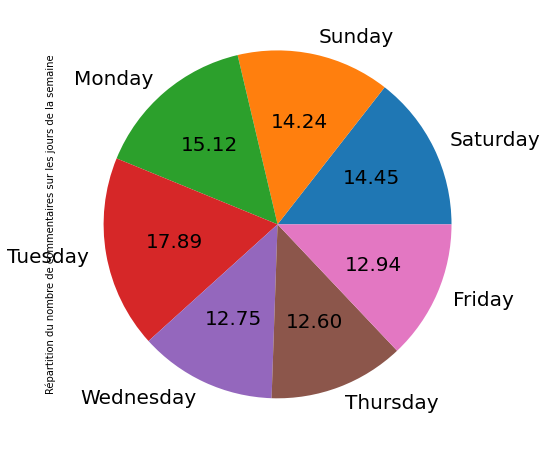

In [223]:
plot_repartition_com_sur_jour(verifie_train_pd)

In [33]:
#C'est le mardi et le lundi qui obtiennent le plus de commentaire par poste.
#Cependant les nombres de commentaire sont bien réparties sur le pie => Les jours participent peu à la target

## Distribution du nombre de commentaires entre le poste publié et la base date/time selectionné. (ECHEC)

In [ ]:
def plot_repartition_com_max_CCX_top10(verifie_train_pd):
    fig, axes = plt.subplots(nrows=1, ncols=5)
    for i in range(1,6):
        list_aggr_train_set=[]
        for train_set in verifie_train_pd:
            list_aggr_train_set.append(train_set.groupby(f"max_CC{i}").max_CC1.sum().sort_index(ascending=False))
        graph=pd.DataFrame(
            {
                "train_set_V1":list_aggr_train_set[0][0:10],
                "train_set_V2":list_aggr_train_set[1][0:10],
                "train_set_V3":list_aggr_train_set[2][0:10],
                "train_set_V4":list_aggr_train_set[3][0:10],
                "train_set_V5":list_aggr_train_set[4][0:10],
            }
        )
        graph.plot(kind="bar",title=f"Répartition des max dans CC{i}",figsize=(10, 5))

In [72]:
def plot_repartition_com_max_CCX(verifie_train_pd):
    #fig, axes = plt.subplots(nrows=1, ncols=5)
    for i in range(1,6):
        list_aggr_train_set=[]
        for train_set in verifie_train_pd:
            list_aggr_train_set.append(train_set.groupby("max_CC1").max_CC1.sum())
        graph=pd.DataFrame(
            {
                "train_set_V1":list_aggr_train_set[0],
                "train_set_V2":list_aggr_train_set[1],
                "train_set_V3":list_aggr_train_set[2],
                "train_set_V4":list_aggr_train_set[3],
                "train_set_V5":list_aggr_train_set[4],
            }
        )
        graph.plot(kind="bar",title=f"Répartition des max dans CC{i}",figsize=(10, 5))
    

In [ ]:
#Distribution des max dans CCx plot les max/nb_max=max (la moyenne des max pour un intervalle de temps)
#Evolution des max suivant les CCX et train_set ?

## Répartition Cible en fonction de H

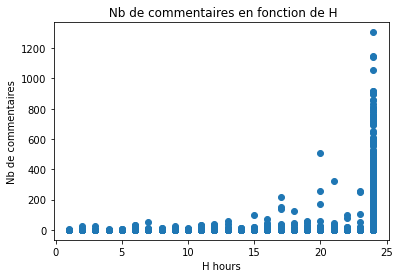

In [200]:
x = train_set_V1["H Local"]
y = train_set_V1["Target Variable"]
plt.scatter(x, y)
plt.xlabel("H hours")
plt.ylabel("Nb de commentaires")
plt.title(" Nb de commentaires en fonction de H")
plt.figsize=(10, 10)

# Modèle training + importation flask

In [ ]:
#Toute les colonnes jouent un rôle sur la target => on garde toute les colonnes (pre-processing deja effectué)

## Standardisations des valeurs + Séparation train/test_set
* L'objectif de la normalisation est de modifier les valeurs des colonnes numériques du jeu de données pour utiliser une échelle commune, sans que les différences de plages de valeurs ne soient faussées et sans perte d'informations.

In [ ]:
#L'apprentissage des modèle prenant trop de temps on prendra 100 lignes du dataset pour tester notre code

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_Xy_train_test_variant=[]#stockera pour chaque variant
for train in verifie_train_pd:
    y=train["Target Variable"]
    X=train.drop(columns="Target Variable")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    list_Xy_train_test_variant.append((X_train,X_test,y_train,y_test))
    



## Utiliser Linear regression/GBoost + conservation des performances


In [75]:
!pip install xgboost

You should consider upgrading via the 'c:\users\nono\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [138]:
modeles_a_tester           = [LinearRegression(),GradientBoostingRegressor()]
pd_models=pd.DataFrame(columns=["Name model","Performance"])
best_algorithm = 0
best_perf = 0
k=0

for (X_train,X_test,y_train,y_test) in list_Xy_train_test_variant:
    for algo in modeles_a_tester:#Le mieux serait de créer des pointeurs vers les modèles afin de les réutiliser
        try:
            name       = str(algo)
            name=name+f" train_set_V{k+1}"
            print (name)
            pointeur_model=algo.fit(X_train,y_train)#Va nous permettre de prédire nos test cases
            performance = algo.score(X_test,y_test) #Score par défaut utiliser On aurait pu faire une étude sur les métriques
            print (performance)
            if performance >  best_perf:
                best_algorithm = name
                best_perf = performance
            
            if 0<performance and performance<1:
                pd_models.loc[k]=[name]+[performance]
        except Exception as e:
            if "label" in str(e): print ("Algo de classification")
            else                : print (str(e)[:50])
        print ("="*30)
    k+=1


LinearRegression() train_set_V1
0.3752765172374415
GradientBoostingRegressor() train_set_V1
0.6547360530662303
LinearRegression() train_set_V2
0.32408723198568434
GradientBoostingRegressor() train_set_V2
0.7150450277878274
LinearRegression() train_set_V3
0.3173945585308384
GradientBoostingRegressor() train_set_V3
0.6745733230629032
LinearRegression() train_set_V4
0.3506074610242147
GradientBoostingRegressor() train_set_V4
0.7105736732696841
LinearRegression() train_set_V5
0.3357844302363838
GradientBoostingRegressor() train_set_V5
0.6747450124527843


In [141]:
pd_models

,Name model,Performance
0,GradientBoostingRegressor() train_set_V1,0.654736
1,GradientBoostingRegressor() train_set_V2,0.715045
2,GradientBoostingRegressor() train_set_V3,0.674573
3,GradientBoostingRegressor() train_set_V4,0.710574
4,GradientBoostingRegressor() train_set_V5,0.674745


In [142]:
print(best_algorithm,best_perf)

GradientBoostingRegressor() train_set_V2 0.7150450277878274


* Conclusion le meilleur modèle est le GradientBoostingRegressor() train_set_V2 0.7150450277878274 (V2 <==> Base Date/time = 22h)

# Grid Search


In [143]:
y=train_set_V2["Target Variable"]
X=train_set_V2.drop(columns="Target Variable")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


In [144]:
def test_hyperparametres(algo, hyperparametres):
    grid       = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [146]:
import numpy as np
espace_de_Recherche = {
    "n_estimators" : [int(x) for x in np.linspace(start=90,stop=120,num=10)],
    'max_features':['auto', 'sqrt']
}
test_hyperparametres(GradientBoostingRegressor(), espace_de_Recherche)

0.6550397575564821 GradientBoostingRegressor(max_features='auto', n_estimators=110)


(0.6550397575564821,
 GradientBoostingRegressor(max_features='auto', n_estimators=110))

In [ ]:
#Voici le choix du meilleur algo (0.6550397575564821,
 #GradientBoostingRegressor(c))
#On prendra celui-ci malgré la différence de score avec l'étude précédente.

# API Flask

In [149]:
#Entrainement modèle avec les meilleurs hyperparameters
regression_model=GradientBoostingRegressor(n_estimators=110,max_features="auto")
regression_model.fit(X_train,y_train)

GradientBoostingRegressor(max_features='auto', n_estimators=110)

In [151]:
#Release our model
import pickle
pickle.dump(regression_model, open('API Flask/models/regression_model.pickle', 'wb'))

In [ ]:
X_test  = scaler.transform(X_test)

# Prédiction sur les test_case (Travail non éffectué)
* permet de calculer le temps de prédiction suivant les modèles et train_set_variant

In [ ]:
columns_test=columns.pop(-1)#Plus de target dans les test cases
test_set_C1=pd.read_csv("Dataset/Testing/TestSet/Test_Case_1.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C2=pd.read_csv("Dataset/Testing/TestSet/Test_Case_2.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C3=pd.read_csv("Dataset/Testing/TestSet/Test_Case_3.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C4=pd.read_csv("Dataset/Testing/TestSet/Test_Case_4.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C5=pd.read_csv("Dataset/Testing/TestSet/Test_Case_5.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C6=pd.read_csv("Dataset/Testing/TestSet/Test_Case_6.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C7=pd.read_csv("Dataset/Testing/TestSet/Test_Case_7.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C8=pd.read_csv("Dataset/Testing/TestSet/Test_Case_8.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C9=pd.read_csv("Dataset/Testing/TestSet/Test_Case_9.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
test_set_C10=pd.read_csv("Dataset/Testing/TestSet/Test_Case_10.csv", sep=",",encoding="UTF-8",header=None,names=columns_test)
